In [1]:
# Multiclass with 1 hidden layer 4 neurons
#activation functions used -> 1. tanh    2.softmax 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
 

In [3]:

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE = 0.2
NOISE = 0.2
EPOCHS = 10000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [4]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
X, y = iris.data, iris.target

In [11]:
#visualization
data_df = pd.DataFrame(X, columns = ['A', 'B', 'C', 'D'])

data_df['species'] = y

data_df.head()

,A,B,C,D,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
#y = pd.get_dummies(y).to_numpy() #Conveting to one-hot encoding
#y

In [13]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [14]:
X_train, X_test, y_train, y_test  =  train_test_split(X, y ,stratify= y, random_state=RANDOM_STATE, test_size=TEST_SIZE, shuffle = True) #

In [15]:
#X_train

In [16]:
#X_test

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

shape of input is frozen i.e. same as number of features.
shape of output is also frozen i.e. same as number of outputs. 
In hidden layer you can add as many no of neurons you want.
bias seats on the top of each neuron.

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [20]:
#first activation function -> tanh
def fn_activ(z):
    return np.tanh(z)

#to change the range from -inf,+ing to -1,1 using tanh
def fn_activ_prime(a):
    return 1 - np.tanh(a)**2


In [21]:
#second activation function -> softmax
def fn_softmax(z):
    '''
    Args:
        z : a matrix of z values of shape
    returns :
        softmax values of z
    '''

    #calculating softmax function
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [22]:
sm = fn_softmax(np.asarray([[8,5,0], [-10, 0, 10]]))
sm.sum(axis=1, keepdims=True) #along axis is always one axis=1, keepdims=True

array([[1.],
       [1.]])

In [23]:
#forward propagation 

def predict(model, X_p):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # forward propagation 
    # Layer 1
    z1 = X_p.dot(W1) + b1   #aggregation for layer 1
    a1 = fn_activ(z1)     #activation for layer 1

    # Layer 2
    z2 = a1.dot(W2) + b2   #aggregation for layer 2
    a2 = fn_softmax(z2)    #activation for layer 2

    return np.argmax(a2, axis=1) #pick index of class with highest probability # argmax gives us probability

In [24]:
#calculating loss as we are taking weights and bias random 

def calculate_loss(model, X_l, y_l):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    m = X_l.shape[0]
    
    # forward propagation 
    # Layer 1
    z1 = X_l.dot(W1) + b1   #aggregation for layer 1
    a1 = fn_activ(z1)     #activation for layer 1

    # Layer 2
    z2 = a1.dot(W2) + b2   #aggregation for layer 2
    a2 = fn_softmax(z2)    #activation for layer 2

    #binary  , element wise multiplication
    data_loss = - ( y_l*np.log(a2) + ( 1-y_l ) * np.log(1-a2) ).sum()   #calculating losses along each sample
 
    return data_loss / m 

In [25]:
loss_hist = {}

In [26]:
#we dont know the weights so building the model 

def build_model(X_tr, y_tr, nn_hdim, nn_out, alpha=ALPHA, epochs=EPOCHS):
    '''
    Args:
        X_tr : Training features
        y_tr : Training labels
        nn_hdim : number of nodes in the hidden layer
        nn_out : size of output
        nn_input_dim : no. of columns
    '''
    m, nn_input_dim = X_tr.shape
    nn_output_dim = nn_out

    #weight between fetaure layer and 1st layer (size = 2, 4(no. of features (incoming), no. of nodes in hidden layer (outgoing)))
    # dtype = np.float32 --> coverts to type float32 i.e reduces size
    W1= np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)

    #weight between 1st hidden layer and output layer (size = 4, 2(no. of nodes in hidden layer (incoming), no. of output(outgoing) ))
    W2= np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)

    # bias (b1) = no. of nodes in input || size = 4
    b1 = np.zeros((1, nn_hdim), dtype = np.float32)
    
    # bias (b2) = no. of nodes in output || size = 2
    b2 = np.zeros((1, nn_output_dim), dtype = np.float32)

    curr_loss = 0

    loss, epoch = [] , []

    for i  in range (0, epochs):
        
        # forward propagation 
        
        # Layer 1 || marked 3 in diagram
        # in notes: x -> z1= x.w1 + b1  ->  
        z1 = X_tr.dot(W1) + b1
        # ->  a[1] = g[z1]
        a1 = fn_activ(z1) 

        # Layer 2  || marked 1 in diagram
        # in notes: z2 = a[1].w2 + b2  -> 
        z2 = a1.dot(W2) + b2
        # ->  a[2] = g[z2]
        a2 = fn_softmax(z2) 


        ########################################################################

        #back propogation of the loss of LAYER 2 || marked 2 in diagram

        #checking the size of the matrix for the multiplication using assert 
        #assert(a2.shape== y_tr.shape), f'check y {a2.shape}/{y_tr.shape}'
        dz2 = a2 - y_tr #remember dimention of a2 and y to be same

        dW2 = (a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'

        db2 = np.sum(dz2, axis = 0, keepdims=True)
        assert (b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T)  
        assert (a1.shape == da1.shape), f'check b2 {a1.shape}/{da1.shape}'

        ##############################################################################

        #back propogation of the loss of LAYER 1 || marked 4 in diagram
        
        dz1 = da1 * fn_activ_prime(z1)  
        assert (z1.shape == dz1.shape), f'check b2 {z1.shape}/{dz1.shape}'

        dW1 = (X_tr.T).dot(dz1)   
        assert (W1.shape == dW1.shape), f'check W2 {W1.shape}/{dW1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert (b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'

        ##############################################################################

        #Gradient Update (updating weight) m = total no. of rows
        W1 += - alpha * dW1 / m  
        b1 += - alpha * db1 / m 
        W2 += - alpha * dW2 / m 
        b2 += - alpha * db2 / m 

        #saving weights and biases in dict to use in other functions
        model = { 'W1' : W1, 'b1' : b1,
                  'W2' : W2, 'b2' : b2 }

    
        curr_loss = calculate_loss(model, X_tr, y_tr)
        loss.append(curr_loss)
        epoch.append(i)

        #printing current loss calculated
        if i % 100 == 0:
            print(f'After epoch: {i:3d}; loss: {curr_loss: .5f}')
        
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    
    return model

In [27]:
 y_train.shape

(120, 3)

In [28]:
nn_out_dim = 3
model = build_model(X_train, y_train, 4, nn_out_dim)

After epoch:   0; loss:  1.95957
After epoch: 100; loss:  0.74347
After epoch: 200; loss:  0.44953
After epoch: 300; loss:  0.28880
After epoch: 400; loss:  0.21377
After epoch: 500; loss:  0.17565
After epoch: 600; loss:  0.15339
After epoch: 700; loss:  0.13899
After epoch: 800; loss:  0.12897
After epoch: 900; loss:  0.12165
After epoch: 1000; loss:  0.11608
After epoch: 1100; loss:  0.11174
After epoch: 1200; loss:  0.10827
After epoch: 1300; loss:  0.10546
After epoch: 1400; loss:  0.10314
After epoch: 1500; loss:  0.10120
After epoch: 1600; loss:  0.09957
After epoch: 1700; loss:  0.09819
After epoch: 1800; loss:  0.09700
After epoch: 1900; loss:  0.09597
After epoch: 2000; loss:  0.09508
After epoch: 2100; loss:  0.09430
After epoch: 2200; loss:  0.09361
After epoch: 2300; loss:  0.09300
After epoch: 2400; loss:  0.09247
After epoch: 2500; loss:  0.09199
After epoch: 2600; loss:  0.09156
After epoch: 2700; loss:  0.09117
After epoch: 2800; loss:  0.09083
After epoch: 2900; loss:

In [29]:
model['W1'].shape    #weight size matiching (2,4)

(4, 4)

<Axes: xlabel='epoch'>

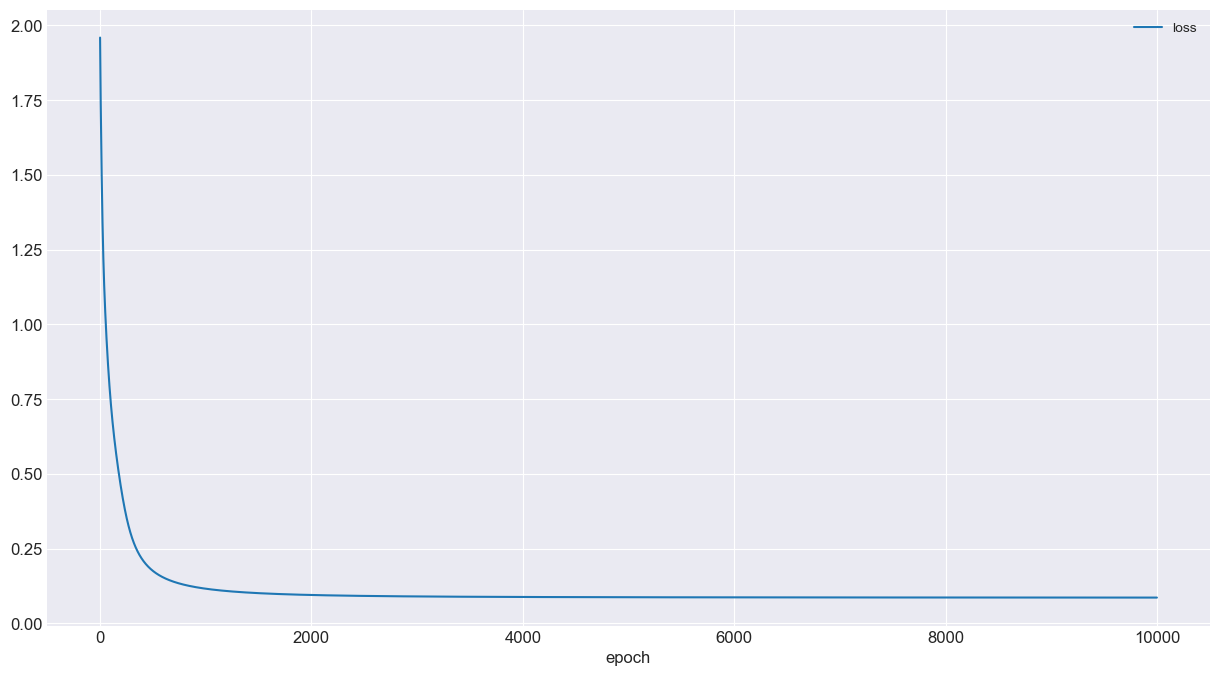

In [30]:
pd.DataFrame(loss_hist).plot(x='epoch')  #loss curve 

In [31]:
np.random.rand(data_train.shape[1]) #w0, w1, w2
#Z = x*w + b
#Z = weights[0]

array([0.61464763, 0.22768325, 0.48603187, 0.8072193 , 0.84422015])

In [32]:
y_pred = predict(model, X_test)
accuracy_score(y_test.argmax(axis=1), y_pred) #

1.0

In [33]:
y_pred = predict(model, X_test)
cmy = confusion_matrix(y_test.argmax(axis=1), y_pred)
cmy

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [34]:
y_pred = predict(model, X_train)
cm = confusion_matrix(y_train.argmax(axis=1), y_pred)
cm

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  1, 39]], dtype=int64)

In [35]:
y_pred = predict(model, X_train)
accuracy_score(y_train.argmax(axis=1), y_pred)

0.9833333333333333

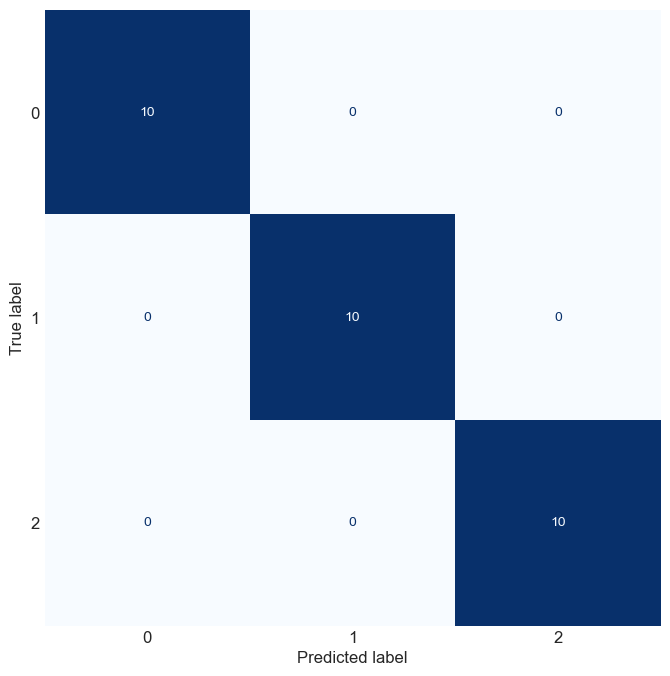

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmy)
fig, ax = plt.subplots(figure=(6,6))
disp.plot(ax = ax, cmap='Blues', colorbar=False);
ax.grid(False);